In [26]:
library(rdydisstools)
library(ggplot2)
library(svglite)
library(glue)
library(dplyr)
library(gridExtra)
library(grid)
setwd('~/notebooks/dissertation')
loadpackages(c('doParallel', 'foreach', 'logging', 'glue', 'grid', 'gridExtra', 'dplyr', 'ggplot2'))
df <- load('artifacts/rq1/maxJ.RData')
thisdir <- '~/notebooks/dissertation/artifacts/figures/'

In [27]:
set.seed(5578)
s4 <- sample(1:5000, 4)

In [28]:
plots <- list()
label <- c('A', 'B', 'C', 'D')
c = 1
for(i in s4){
    lab = label[c]
    load(glue('data/simsample{i}.RData'))
    plots[[lab]] = plotBehavior(df, method='mdRQ1', min=-3,max=3) %>%  
    + annotate("text", x = -2.9, y=max(.$data$informedness), label = paste(lab), color='black')
    c = c + 1
}

Saving 6.67 x 6.67 in image


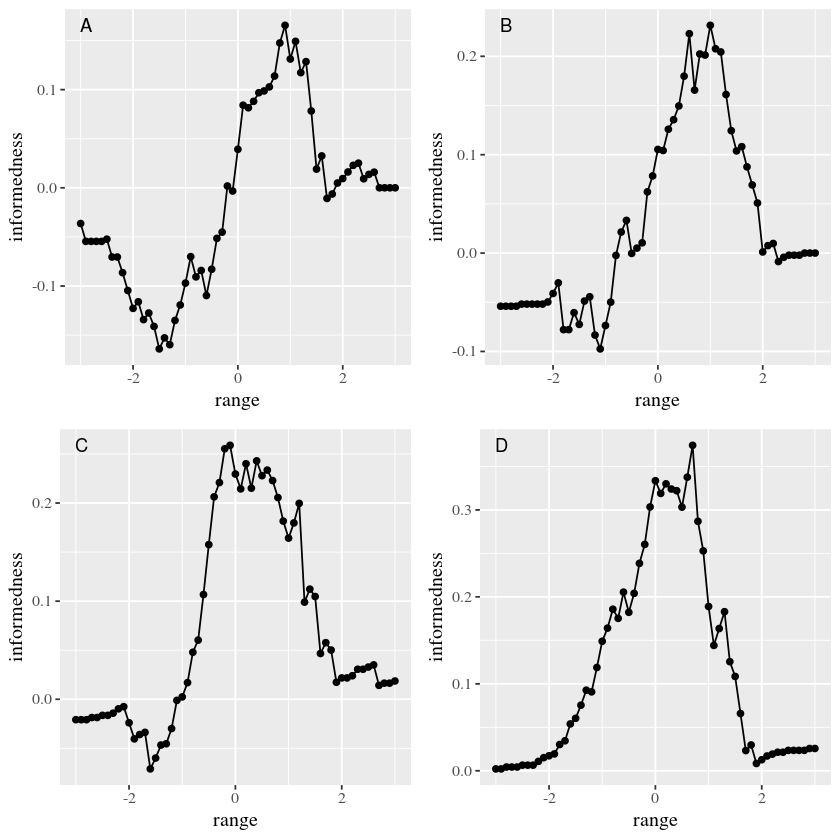

In [29]:
fourby <- gridmap(plotlist=plots, cols=2)
ggsave(paste0(thisdir, 'images/mdfourbyrq1.svg'), fourby, device='svg')

In [24]:
devtools::install_github('ryentes/rdy-dissertation-tools')

from URL https://api.github.com/repos/ryentes/rdy-dissertation-tools/zipball/master
Installing rdydisstools
'/usr/lib64/R/bin/R' --no-site-file --no-environ --no-save --no-restore  \
  --quiet CMD INSTALL  \
  '/tmp/Rtmp2gMVIX/devtools10de6f8b779b/ryentes-rdy-dissertation-tools-50e9b5b'  \
  --library='/home/centos/R/x86_64-redhat-linux-gnu-library/3.5'  \
  --install-tests 

Reloading installed rdydisstools


In [25]:
mp2 <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)
  
  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)
  
  numPlots = length(plots)
  
  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- t(matrix(seq(1, cols * ceiling(numPlots/cols)),
                       ncol = cols, nrow = ceiling(numPlots/cols)))
  }
  
  if (numPlots==1) {
    return(plots[[1]])
    
  } else {
    # Set up the page
    return(grid.arrange(grobs=plots, layout_matrix=layout))
  }
}